In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Think_101\AppData\Local\Temp\ipykernel_25416\1542288338.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comments_by_week, x='week_start', y='count', palette='viridis')


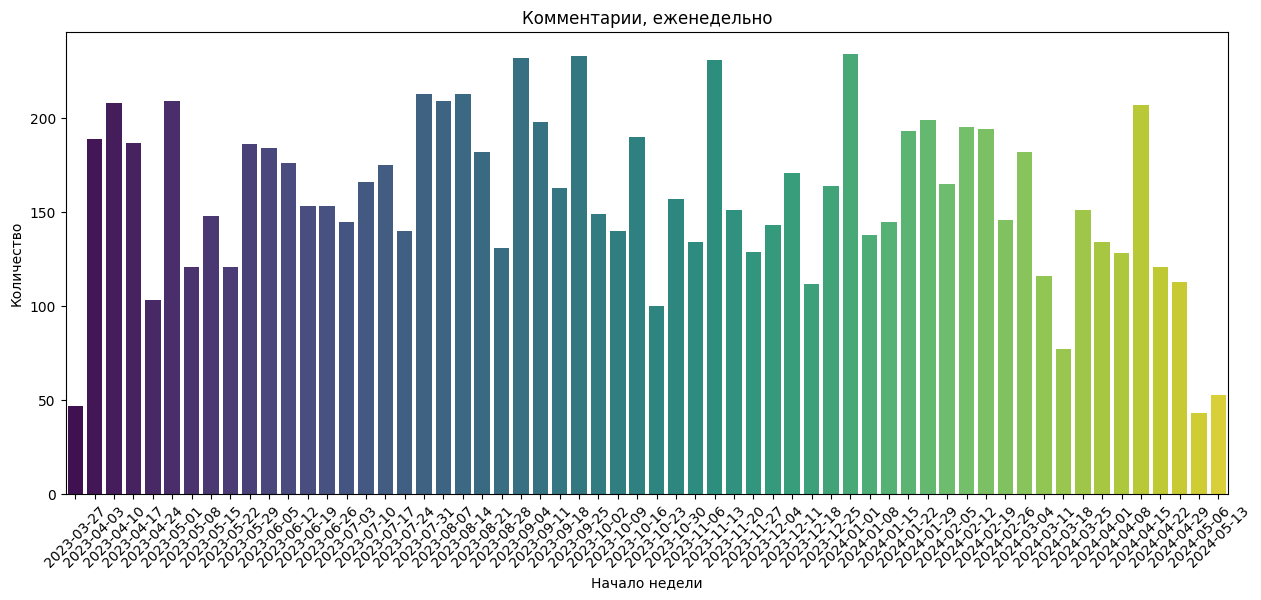

In [2]:
df1 = pd.read_excel('9000_0_1_gpt_4o_11.xlsx')
# Dates with highest tweet counts
top_tweet_dates = df1.groupby(pd.Grouper(key='date', freq='D')).size().reset_index(name='count').sort_values(by='count', ascending=False)
#print(top_tweet_dates.head(10))
# Number of comments per week (bar plot)
comments_by_week = df1.groupby(pd.Grouper(key='date', freq='W-MON', label='left')).size().reset_index()
comments_by_week.columns = ['week', 'count']
comments_by_week['week_start'] = comments_by_week['week'].dt.strftime('%Y-%m-%d')
comments_by_week['week_end'] = (comments_by_week['week'] + pd.Timedelta(days=6)).dt.strftime('%Y-%m-%d')

plt.figure(figsize=(15, 6))
sns.barplot(data=comments_by_week, x='week_start', y='count', palette='viridis')
plt.title('Комментарии, еженедельно')
plt.xticks(rotation=45)
plt.xlabel('Начало недели')
plt.ylabel('Количество')
plt.show()
